<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

<Ответ>: Стали использоваться функции активации RELU, потому что они достаточно быстрее вычисляются (раньше использовался в основном tanh).

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

<Ответ>: У современных нейронных сетей очень много параметров, что ведет к переобучению.
Чтобы обучить нейронную сеть, нужно много входных размеченных данных, что в определенной области может быть проблемой.


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

<Ответ>: Сильно переобучимся. Если хотим разнообразить входной датасет, то можно использовать аугментирование данных.

**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

<Ответ>: Казалось бы, если cnn может извлекать характерные фичи из изображений, то что ей мешает так же извлекать характерные фичи из музыки (ритм, тембр, тональность и т.д.)? Извлекаем характерные фичи, затем отображаем набор извлеченных фичей в оптимальный соответствующий стиль музыки.

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [3]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  6660k      0  0:00:25  0:00:25 --:--:-- 8252k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

%matplotlib inline

In [5]:
tf.__version__

'1.7.0'

In [6]:
tf.test.is_gpu_available()

True

In [0]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [0]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

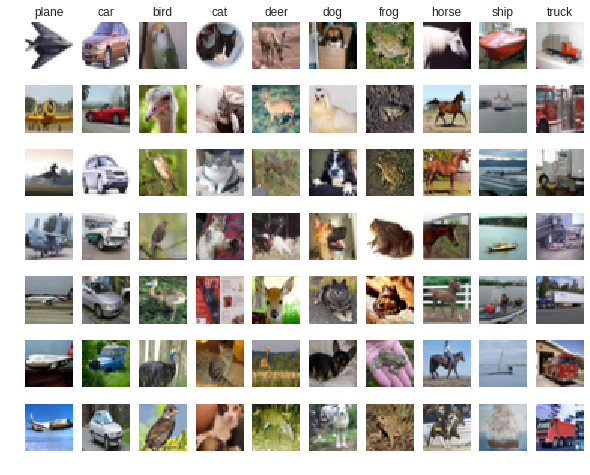

In [9]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
X_train = X_train.transpose(0, 2, 3, 1)
X_test  = X_test.transpose(0, 2, 3, 1)

In [11]:
print(np.mean(X_train))
print(np.mean(X_test))

120.70756512369792
121.52915475260417


# Scale data

In [0]:
train_min = X_train.min(axis=(0, 1), keepdims=True)
train_max = X_train.max(axis=(0, 1), keepdims=True)
X_train = (X_train - train_min)/(train_max - train_min)

In [0]:
test_min = X_test.min(axis=(0, 1), keepdims=True)
test_max = X_test.max(axis=(0, 1), keepdims=True)
X_test = (X_test - test_min)/(test_max - test_min)

In [14]:
print(np.mean(X_train))
print(np.mean(X_test))

0.4733630004850874
0.47658492059844665


# Divide on train and validation

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

# Class of CNN

In [0]:
class ConvNeuralNetworkTF():
    def __init__(self):
        self.learning_rate = tf.placeholder(
            tf.float32,
            shape=None,
            name='learning_rate')
        self.is_training = tf.placeholder(tf.bool, shape=None)
        self.regularizer = tf.contrib.layers.l2_regularizer(scale=0.0001, scope=None)
        
        # Input Layer
        self.input_layer = tf.placeholder(
            tf.float32, 
            shape=[None, 32, 32, 3], 
            name="input"
        )

        # Convolutional Layer #1
        conv1 = tf.layers.conv2d(
            inputs=self.input_layer,
            filters=48,
            kernel_size=[3, 3],
            padding="SAME",
            activation=tf.nn.relu,
            kernel_regularizer=self.regularizer
        )
        # Convolutional Layer #2        
        conv2 = tf.layers.conv2d(
            inputs=conv1,
            filters=48,
            kernel_size=[3, 3],
            padding="SAME",
            activation=tf.nn.relu,
            kernel_regularizer=self.regularizer
        )
        
        
        # Batch norm #1
        batch_norm1 = tf.layers.batch_normalization(
            inputs=conv2,
            axis=3)

        # Pooling Layer #1
        pool1 = tf.layers.max_pooling2d(
            inputs=batch_norm1, 
            pool_size=[2, 2], 
            strides=2)
        # DROP
        drop1 = tf.layers.dropout(inputs=pool1, rate=0.25, training=self.is_training)


        # Convolutional Layer #3 
        conv3 = tf.layers.conv2d(
            inputs=drop1,
            filters=96,
            kernel_size=[3, 3],
            padding="SAME",
            activation=tf.nn.relu,
            kernel_regularizer=self.regularizer
        )
        
        # Convolutional Layer #4        
        conv4 = tf.layers.conv2d(
            inputs=conv3,
            filters=96,
            kernel_size=[3, 3],
            padding="SAME",
            activation=tf.nn.relu,
            kernel_regularizer=self.regularizer
        )
        

        
        # Batch norm #2
        batch_norm2 = tf.layers.batch_normalization(
            inputs=conv4,
            axis=3)
        
        # Pooling Layer #2
        pool2 = tf.layers.max_pooling2d(
            inputs=batch_norm2, 
            pool_size=[2, 2], 
            strides=2)
        # DROP
        drop2 = tf.layers.dropout(inputs=pool2, rate=0.25, training=self.is_training)
        
        
        # Convolutional Layer #5
        conv5 = tf.layers.conv2d(
            inputs=drop2,
            filters=192,
            kernel_size=[3, 3],
            padding="SAME",
            activation=tf.nn.relu,
            kernel_regularizer=self.regularizer            
        )
        
        # Convolutional Layer #6        
        conv6 = tf.layers.conv2d(
            inputs=conv5,
            filters=192,
            kernel_size=[3, 3],
            padding="SAME",
            activation=tf.nn.relu,
            kernel_regularizer=self.regularizer           
        )

        # Batch norm #3
        batch_norm3 = tf.layers.batch_normalization(
            inputs=conv6,
            axis=3)
        
        # Pooling Layer #3
        pool3 = tf.layers.max_pooling2d(
            inputs=batch_norm3, 
            pool_size=[2, 2], 
            strides=2)
        # DROP
        drop3 = tf.layers.dropout(inputs=pool3, rate=0.25, training=self.is_training)
        

        drop3_to_flat = tf.reshape(drop3, [-1, 4 * 4 * 192])
        
        # Dense Layer #1
        dense1 = tf.layers.dense(
            inputs=drop3_to_flat,
            units=1024,
            activation=tf.nn.relu)
        # DROP
        drop4 = tf.layers.dropout(inputs=dense1, rate=0.5, training=self.is_training)
        
        # Dense Layer #2
        dense2 = tf.layers.dense(
          inputs=drop4,
          units=256,
          activation=tf.nn.relu)
        
        # DROP
        drop5 = tf.layers.dropout(inputs=dense2, rate=0.5, training=self.is_training)

        # Logits Layer
        self.logits = tf.layers.dense(inputs=drop5, units=10)
        
        # ---------------END OF BUILDING CNN---------------------

        # predictions
        self.predictions = tf.argmax(input=self.logits, axis=1)
        
        # labels
        self.labels = tf.placeholder(tf.int64, name="labels")

        # accuracy
        correct_predictions = tf.equal(self.labels, self.predictions)
        self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

        # loss
        self.loss = tf.losses.sparse_softmax_cross_entropy(labels=self.labels, logits=self.logits)

        # optimizer
        self.optimizer_step = tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.loss, global_step=tf.train.get_global_step())
        
        # --------------------ENF OF INIT----------------------



    def eval_fn(self, X, y, sess):
        '''
        returns tuple (loss, accuracy) for model evaluation phase
        '''
        loss = sess.run(self.loss, feed_dict={self.input_layer:X, self.labels:y, self.is_training:False})
        accuracy = sess.run(self.accuracy, feed_dict={self.input_layer:X, self.labels:y, self.is_training:False})

        return (loss, accuracy)

    def train_fn(self, X, y, sess, lr):
        '''
        returns tuple (loss, accuracy) for model train phase
        '''
        sess.run(self.optimizer_step, feed_dict={self.input_layer:X, self.labels:y, self.learning_rate:lr, self.is_training:True})

        return self.eval_fn(X, y, sess)



    def predict_fn(self, X, sess):
        '''
        returns y_pred for model predict phase
        '''
        return sess.run(self.predictions, feed_dict={self.input_layer:X, self.labels:y, self.is_training:False})

In [0]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

#epoch: 0, learning_rate: 0.001
Epoch 1 of 35 took 31.068s
  train loss:		1.673124
  train accuracy:		37.53 %
  valid loss:		1.452953
  valid accuracy:		45.45 %
#epoch: 1, learning_rate: 0.0009090909090909091
Epoch 2 of 35 took 30.537s
  train loss:		1.167160
  train accuracy:		57.79 %
  valid loss:		1.112991
  valid accuracy:		59.19 %
#epoch: 2, learning_rate: 0.0008264462809917355
Epoch 3 of 35 took 30.520s
  train loss:		0.902105
  train accuracy:		67.86 %
  valid loss:		0.916901
  valid accuracy:		66.96 %
#epoch: 3, learning_rate: 0.0007513148009015777
Epoch 4 of 35 took 30.517s
  train loss:		0.732389
  train accuracy:		74.20 %
  valid loss:		0.769716
  valid accuracy:		72.40 %
#epoch: 4, learning_rate: 0.0006830134553650705
Epoch 5 of 35 took 30.511s
  train loss:		0.609752
  train accuracy:		78.74 %
  valid loss:		0.702477
  valid accuracy:		75.21 %
#epoch: 5, learning_rate: 0.0006209213230591549
Epoch 6 of 35 took 30.558s
  train loss:		0.511169
  train accuracy:		82.13 %
  val

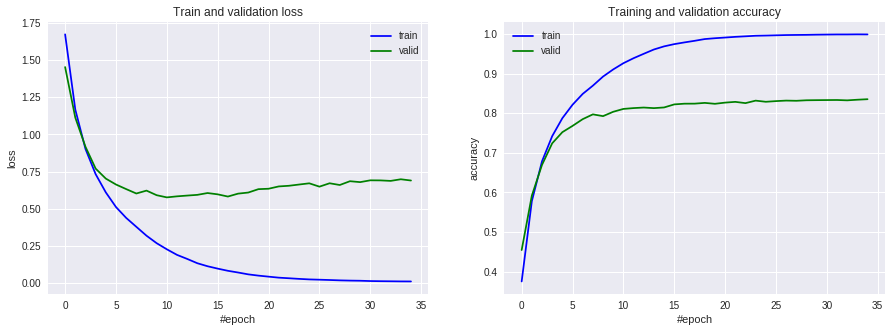

Final results:
  test accuracy:		82.31 %
Feed more!


In [28]:
cnn = ConvNeuralNetworkTF()

num_epochs = 35 
batch_size = 128
train_loss_history = []
train_acc_history  = []
valid_loss_history = []
valid_acc_history  = []
learning_rate = 0.0007
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    tf.local_variables_initializer().run()
    
    for epoch in range(num_epochs):
        # In each epoch, we do a full pass over the training data:
        print('#epoch: {}, learning_rate: {}'.format(epoch, learning_rate))
        train_loss = 0
        train_acc = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(X_train, y_train, batch_size):
            inputs, targets = batch
            train_loss_batch, train_acc_batch = cnn.train_fn(inputs, targets, sess, learning_rate)
            train_loss += train_loss_batch
            train_acc += train_acc_batch
            train_batches += 1
        learning_rate /= 1.1
        
        # And a full pass over the validation data:
        valid_loss = 0
        valid_acc = 0
        valid_batches = 0
        for batch in iterate_minibatches(X_val, y_val, batch_size):
            inputs, targets = batch
            valid_loss_batch, valid_acc_batch = cnn.eval_fn(inputs, targets, sess)
            valid_loss += valid_loss_batch
            valid_acc += valid_acc_batch
            valid_batches += 1
        train_loss_epoch = train_loss / train_batches
        train_acc_epoch  = train_acc / train_batches
        valid_loss_epoch = valid_loss / valid_batches
        valid_acc_epoch  = valid_acc / valid_batches

        train_loss_history.append(train_loss_epoch)
        train_acc_history.append(train_acc_epoch)
        valid_loss_history.append(valid_loss_epoch)
        valid_acc_history.append(valid_acc_epoch)

      
        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
        print("  valid loss:\t\t{:.6f}".format(valid_loss / valid_batches))
        print("  valid accuracy:\t\t{:.2f} %".format(valid_acc / valid_batches * 100))

    
    # Visualize
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].set_title("Train and validation loss")
    axs[0].set_xlabel("#epoch")
    axs[0].set_ylabel("loss")
    axs[0].plot(train_loss_history, 'b', label="train")
    axs[0].plot(valid_loss_history, 'g', label="valid")
    axs[0].legend()

    axs[1].set_title("Training and validation accuracy")
    axs[1].set_xlabel("#epoch")
    axs[1].set_ylabel("accuracy")
    axs[1].plot(train_acc_history, 'b', label="train")
    axs[1].plot(valid_acc_history, 'g', label="valid")
    axs[1].legend()
    plt.show()
    
    
    test_acc = 0
    test_batches = 0
    for batch in iterate_minibatches(X_test, y_test, 500):
        inputs, targets = batch
        _, acc = cnn.eval_fn(inputs, targets, sess)
        test_acc += acc
        test_batches += 1
    print("Final results:")
    print("  test accuracy:\t\t{:.2f} %".format(test_acc / test_batches * 100))

    if test_acc / test_batches * 100 > 92.5:
        print("Achievement unlocked: mage 80 lvl")
    else:
        print("Feed more!")

### Hi, my name is `...Luke Cifarwalker...`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

##### I gonna build a neural network, that
будет классифицировать с точностью хотя бы 82%!!!

How could i be so naive?!

##### One day, with no signs of warning,
**Итерация I**: test accuracy -- 10%, learning rate=0.001, num_epochs=10, batch_size=64 

Cеть выдает на тесте 10% процентов accuracy. Кажется, даже рандом лучше классифицирует, чем моя сетка.((( Feels bad, man.

---

**Итерация II**: test accuracy -- 61.82%, learning rate=0.001, num_epochs=10, batch_size=64 

Попробовала отскейлить данные. Сеть начала выдавать что-то адекватное, но до 80% accuracy еще далеко.

---

**Итерация III**: test accuracy -- 65.59%, train_accuracy -- 83.03%,  learning_rate=0.001, num_epochs=20, batch_size=64

Попробовала с каждой эпохой делить learning_rate на 1.25 (для этого мы передаем в optimizer_step плейхолдер).
Увеличила количество эпох для трейна.
 
---

**Итерация IV**: test accuracy -- 67.09 %, train_accuracy -- 85.82 %,  learning_rate=0.001, num_epochs=20, batch_size=64

Добавила batch_normalisation после каждого conv2d layer'а. 

---

**Итерация V**: test accuracy -- 69.24 %, train_accuracy -- 86.77 %,  learning_rate=0.001, num_epochs=20, batch_size=64

Добавила l2_reg к каждый conv2d layer.

---

**Итерация VI**: test accuracy -- 74.22 %, train_accuracy -- ???(забыла записать) %,  learning_rate=0.001, num_epochs=20, batch_size=128

Кардинально изменила архитектуру сети (раньше архитектура была такая же, как из туториала с tensorflow: https://www.tensorflow.org/tutorials/layers), поменяла оптимайзер на adam, увеличила batch_size:

** Current achitecture**:
```
conv 48 3x3 padding=same
conv 48 3x3 
maxpool 2x2
dropout rate=0.25
conv 96 3x3 padding=same
conv 96 3x3
maxpool 2x2
dropout rate=0.25
conv 192 3x3 padding=same
conv 192 3x3
maxpool 2x2
dropout rate=0.25
dense 512
dropout rate=0.5
dense 256
dropout rate=0.5


```

---

**Итерация VII**: test_accuracy = 75.15 %

Добавила batch norm перед каждым maxpool. Кажется, почти ничего не изменилось.

---

**Итерация VIII**: test_accuracy = 80.21 %

Стала делить learning rate = 0.0005 на 1.1 каждую эпоху. Получила значительный прирост accuracy на тесте.

---

**Итерация IX**: test_accuracy = 82.15 %

В предпоследнем слое dense поставила units=1024.

---

**Итерация IX**: test_accuracy = 82.31%

Стартовый learning_rate=0.0007

---


##### Finally, after __  iterations, __ mugs of [tea/coffee]

** Final achitecture**:
```
conv 48 3x3 padding=same
conv 48 3x3 padding=same
batch norm
maxpool 2x2
dropout rate=0.25
conv 96 3x3 padding=same
conv 96 3x3 padding=same
batch norm
maxpool 2x2
dropout rate=0.25
conv 192 3x3 padding=same
conv 192 3x3 padding=same
batch norm
maxpool 2x2
dropout rate=0.25
dense 512
dropout rate=0.5
dense 256
dropout rate=0.5

стартовый learning_rate=0.0007, каждую эпоху делим его на 1.1; учимся 25 эпох; optimizer -- adam.

```
